<a href="https://colab.research.google.com/github/Aparajita-Sengupta/Aparajita-Sengupta/blob/main/Malaria_Capstone_Final_Merged5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Malaria is a devastating disease that is transmitted to human beings through infected female Anopheles mosquito bites that carry Plasmodium parasites. The malaria parasites, Plasmodium, enters the bloodstream when the mosquitoes bite a person, in form of sporozites. These sporozites can multiply quickly without causing any symptoms usually for days but stay alive in a human liver up to a year. The parasites then travel to the lungs via the heart and settlein the lung capillaries. That can cause severe respiratory diseases. Hence, an early treatment can avoid further complications or even death due to malaria.

According to the Centers for Disease Control and Prevention (CDC), about 627,000 people died of malaria in 2020, most of which are in South America or South Asia where the resources are scarce and there is socio-economic instability.

Most vulnerable to malaria are children under five years of age. Every twelfth child in the World that died in 2017, died because of malaria.

Traditionally, malaria in diagnosed by experts in the laboratory, where they visually distinguish between infected and uninfected blood cells. It is a costly, tedious and time-consuming process. The diagnostic accuracy depends on human expertise can be adversely impacted by inter-observer variability.

In order to reduce the time, cost, error and requirement for human supervision, an automated classification technique can be implemented.
This can help with the early and accurate detection of malaria. One can use Machine Learning (ML) and Artificial Intelligence (AI) and obtain higher accuracy than manual classification. Hence we propose using Deep Learning Algorithm, more specifically, Convolutional Neural Network, for malaria detection.<br>

**The objectives:** Build an efficient computer vision model to detect malaria. The model should identify whether the image of a red blood cell is that of one infected with malaria or not, and classify the same as parasitized or uninfected, respectively.<br>

**The key questions:** 
- Can we develop a cost-effective, automated Deep Learning algorithm to identify the malaria-causing parasitized cells from the uninfected cells that do not cause malaria?
- Can we do the above with a higher level of accuracy and ease than a manual detection of infected cells?
- Will our Deep Learning algorithm be scalable for large data sets?<br>

**The problem formulation:** We will try to formulate a Deep learning algorithm that will be automated, time and cost effective, and scalable for large data sets. A Deep Learning network will be developed to learn and identify patterns in the parasitized cells and predict them with high accuracy.<br>

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile
import os
import glob

from PIL import Image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
ls /content/cell_images

test/  train/


In [ ]:
ls /content/cell_images/train

parasitized/  uninfected/


In [ ]:
ls /content/cell_images/test

parasitized/  uninfected/


As seen above, the extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
print(type(train_images), type(train_labels))
print(len(train_images), len(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
24958 24958


In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(type(test_images), type(test_labels))
print(len(test_images), len(test_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
2600 2600


###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print("Train Image Shape:", train_images.shape)
print("Test Image Shape:", test_images.shape)
# print("First image:\n", train_images[0])

Train Image Shape: (24958, 64, 64, 3)
Test Image Shape: (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels 

print("Train label Shape:", train_labels.shape)
print("Test label Shape:", test_labels.shape)

Train label Shape: (24958,)
Test label Shape: (2600,)


####<b> Observations and insights: 

About 90% of the data is in the train set and 10% in the test set. 
The images have been shaped to a size of (64, 64, 3), The index 3 represents the RGB color.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
print('Train:', 'Min =',train_images.min(), '; Max =', train_images.max())
print('Test :', 'Min =',test_images.min(), '; Max =',test_images.max())

Train: Min = 0 ; Max = 255
Test : Min = 0 ; Max = 255


####<b> Observations and insights: 
There are 256 (2^8) colors that can be displayed in 8 bits (when 8 bits is required to display the image). Hence the range of pixel values are (0, 255).







###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
from collections import Counter
print('Train:', Counter(train_labels), '\nTest:', Counter(test_labels))


Train: Counter({1: 12582, 0: 12376}) 
Test: Counter({1: 1300, 0: 1300})


In [ ]:
# Using value_counts to count the values of parasitized and uninfected cells
#print('train_set \n', pd.DataFrame(train_labels).value.counts(), 'test_set \n', pd.DataFrame(test_labels).value.counts())

In [ ]:
# Using glob and then using len to count the values of parasitized and uninfected cells for train set
import os
import glob

base_dir = os.path.join('/content/cell_images/train')

infected_dir = os.path.join(base_dir,'parasitized')
healthy_dir = os.path.join(base_dir,'uninfected')

infected_files = glob.glob(infected_dir +'/*.png')
healthy_files = glob.glob(healthy_dir +'/*.png')

len(infected_files), len(healthy_files)

(12582, 12376)

In [ ]:
# Using glob and then using len to count the values of parasitized and uninfected cells for test set
import os
import glob

base_dir = os.path.join('/content/cell_images/test')

infected_dir = os.path.join(base_dir,'parasitized')
healthy_dir = os.path.join(base_dir,'uninfected')

infected_files = glob.glob(infected_dir +'/*.png')
healthy_files = glob.glob(healthy_dir +'/*.png')

len(infected_files), len(healthy_files)

(1300, 1300)

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: 
- We normalize the images so that the pixel intensities have a normal distribution and ranges between (0, 1).
- This ensures that each pixel, which is the input parameter, has the same data distribution.
- This helps in faster convergence when training the neural network.

###<b> Plot to check if the data is balanced

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

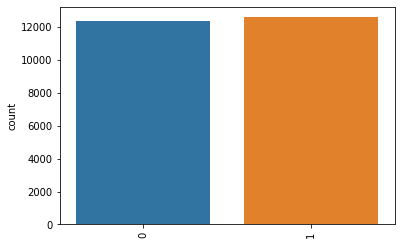

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
sns.countplot(train_labels)
plt.xticks(rotation = 'vertical')


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

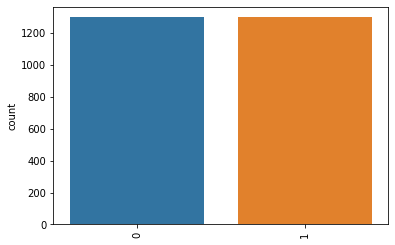

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
sns.countplot(test_labels)
plt.xticks(rotation = 'vertical')

####<b> Observations and insights: 
- The test data is balanced, while the train data is not balanced. There is a slight disrepancy in the number of values in each level in the training set.
- A balanced data set is usually preferred while performing statistical tests because then the test with have larger statistical power, i.e., the likelihood of a significance test detecting an effect when there actually is one. 
- The test statistics is unlikely to be affected by homoscedasticity (i.e., variance is likely to remain the same for balanced data).

### <b>Data Exploration</b>
Let's visualize the images from the train data

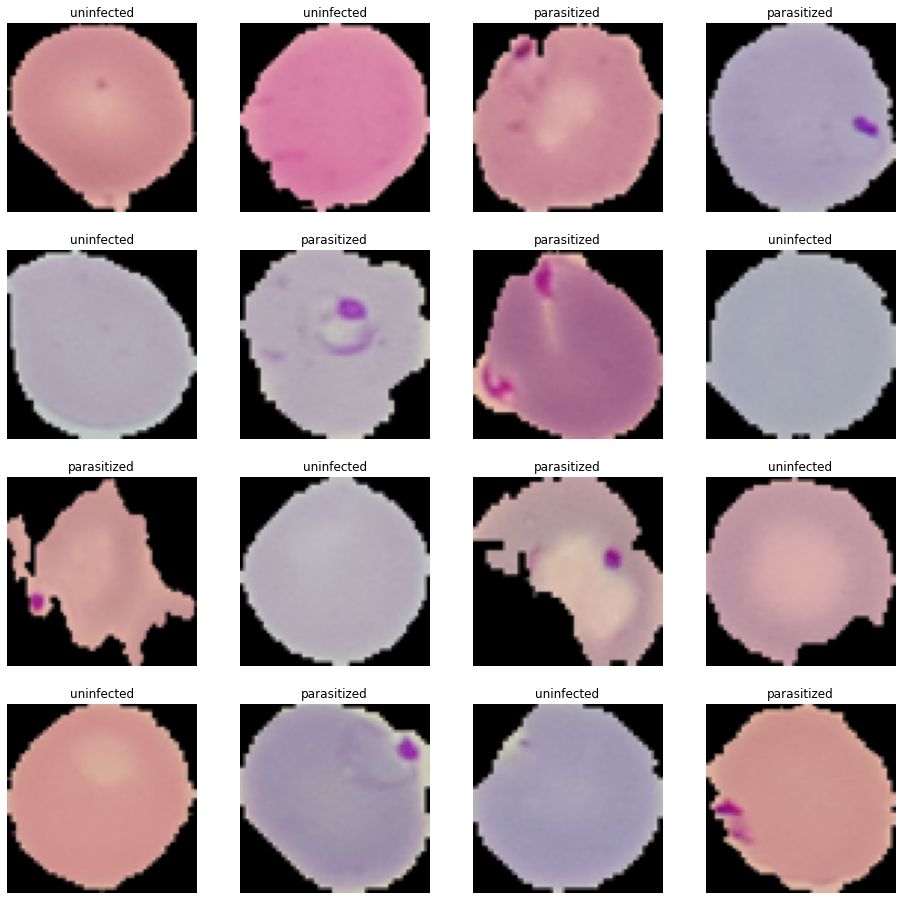

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: 

- The parasitized cells have one or more dark purple patches on them, which are missing in the uninfected cells.
- These patches will be our most important identifying features to differentiate between parasitized and uninfected cells.

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

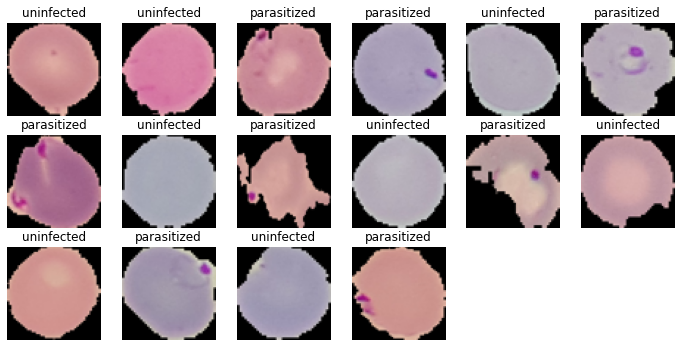

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


####<b> Observations and insights: 

-Even with a smaller figure size, the images capture the purple patches effectively.


###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

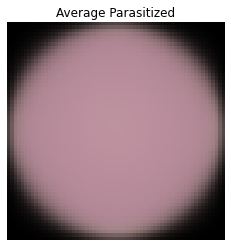

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

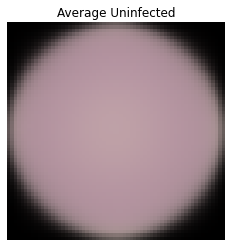

In [ ]:
# Similarly write the code to find the mean image of uninfected

uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


In [ ]:
# Function to find the median
def find_median_img(full_mat, title):

    # Calculate the average
    median_img = np.median(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(median_img)

    plt.title(f'Median {title}')

    plt.axis('off')

    plt.show()

    return median_img

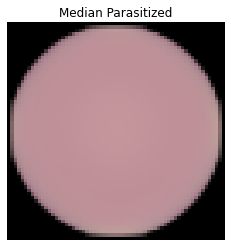

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_median = find_median_img(np.array(parasitized_data), 'Parasitized')   # find the median

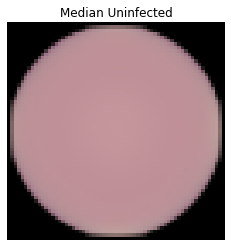

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              uninfected_data.append([img])          

uninfected_median = find_median_img(np.array(uninfected_data), 'Uninfected')   # find the median

####<b> Observations and insights:

- Mean images consider the pixels around a central pixel and calculate the average of these pixels, and then replaces the central pixel with the average.
- This averaging smoothens the data and removes the noise and the details.
- However, doing this takes away the identifying feature of the parasitized cells which is the dark purple patch.
- We see a similar effect for median smoothing.
- Hence, these two methods of image smoothing are not useful for our purpose.



### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

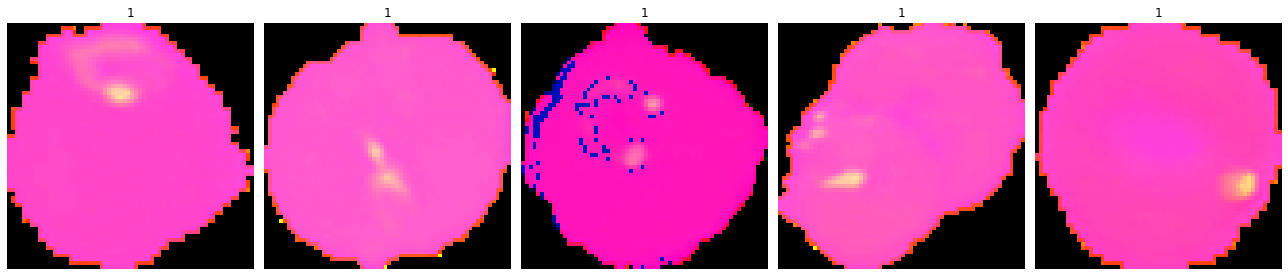

In [ ]:
viewimage = np.random.randint(1,100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

    Title = train_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(gfx[i])
    ax[t].set_axis_off()
    fig.tight_layout()

###<b> Converting the test data

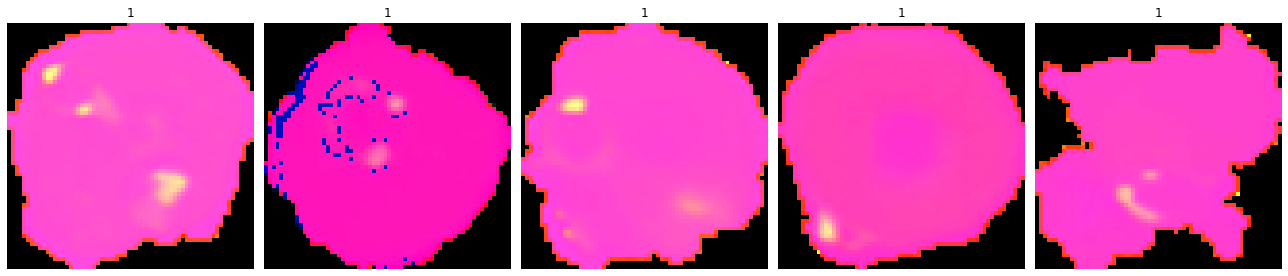

In [ ]:
# Similarly you can visualize for the images in the test data

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights:
HSV color space is consists of 3 matrices: 'hue' (i.e., color), 'saturation' (i.e., amount to which that respective color is mixed with white) and 'value' (i.e., the amount to which that respective color is mixed with black. HSV is effective for color-based image segmentation which is required to identify the darker patches in our images. 
On the other hand, RGB color space, the red, green and blue colors are correlated with the luminance/intensity of light. Hence it is more difficult to perform image segmentation in RGB color space. As we can see in the picture below, the features (the darker patches) are preserved in the HSV color images. We will convert our images to HSV color space.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

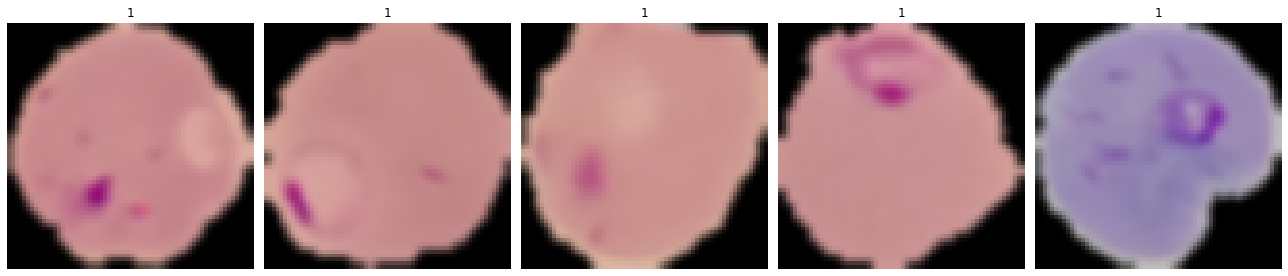

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data

***Observations and insights: ***

Why do we want the images to be blurred/smoothened?
-	We want the input images to the CNN such that they are easier to process without losing the most important features that are required for accurately predicting the outcome. This is particularly important for large data sets. 
-	Image smoothening takes away the noise and unnecessary details of an image and makes it easy to find the features we are most interested in.
-	Image processing like edge detection and thresholding work better if the image is first smoothened. 
-	The parasitized cells show a dark purple patch, whereas the uninfected cells do not show any such darker patches.
-	We need to make sure that any image processing conserves and highlights these patches so that our algorithm can identify them easily, while removing noise and unnecessary details.


Why Gaussian smoothing?

Gaussian Smoothing uses the gaussian function. It blurs the image to reduce the details and noise from the image. It also produces a rotationally symmetric image. However, it doesn’t remove the identifying dark patches in the original images of parasitized cells, unlike the mean and median image filtering. Hence, Gaussian blurring can be used to smoothen our data and reduce noise and unnecessary details in our images.

## **Proposed approach**

**Potential techniques:** I will start with a basic Convolutional Neural Network (CNN) for solving this problem. I will then fine tune the hyperparameters to increase the model efficiency. The reason for choosing this method over others is as follow:
- Machine Learning methods require hand-engineered features which is time-consuming.
- CNN on the other hand, contains convolutions layers, which form the heart of the CNN algorithm. These layers Learn the patterns based on the previous input. 
- Hence, the convoution layers learn the features within the algorithm itself and hence, feature-learning is automated, i.e., no manual intervention is required to identify the features. This is time effective, computationally effective, as well as cost effective.
- Pooling layers within CNN are used to downsize the sample and reduce the dimension of the input without losing the critical information that is required for a prediction with high accuracy.
- Artificial Neural Networks (ANN) do not contain the convolution and pooling layers. Hence, it cannot learn the features within the algorithm automatically. The features need to be explicitly provided as an input to the neural network. Hence it required human supervision. Also, a 2-D image will be required to be converted to a 1-D vector for an ANN. This increases the number of trainable parameters and the process is not very time, cost or computationally effective any more.
-  Recurrent Neural Networks (RNN) can handle images. However, RNNs are better at handling temporal or sequential information. Hence, they are more effective in time series problems, speech, audio and video related inputs. However, an image is a spatial data and not a temporal data. RNNs are less effective than CNN when it comes to resolving different features in a given image. CNN is also faster than RNN.


I would also like to implement Transfer learning Neural Networks require a large number of labelled input data which are manually, as well as time and cost intensive. Hence, they are often difficult to obtain. Also, if a Neural Network is created for a specific task, it may be highly accurate for that set of tasks, but not so for other types of tasks. In Transfer learning, the knowledge gained from one task can be used to solve similar tasks. The knowledge gained can be the 'features' or 'weights'. Hence, the algorithm is no longer an isolated single task solver. Also, by Transfer learning when applicable, we can speed up the process, may require less training data, and also predict more accurately.

- I will use pre-trained models that performs Transfer knwoledge: Very Deep Convolutional Networks/VGG-16 and/or VGG-19 (Visual Geometry Group). 
- These models are used train computer vision/images and they contain millions of parameters/weights that have been obtained by training more than a million images.
- VGG-16 and VGG-19 have 16 and 19 learnable parameters layers respectively, that can be fine-tuned.<br>

**Overall solution design:** 
- Step 1: Split the data into training set and test set. Keep the test data separate. Now split the training data into training and validation sets. 
- Step 2: Create a CNN model. 
- Step 3: Train the model on the training set and test it on the validation set and check for accuracy and minimized the loss.
- Step 4: Fine-tune the hyperparameters and check again if it has improved accuracy and minimized the loss.
- Step 5: Try VGG-16 and/or VGG-19 model and check if accuracy has improved and the loss minimized.
- Step 6: Fine-tune VGG-16 and/or VGG-19 model with image augmentation and if it has improved accuracy and minimized the loss.<br>

**Measures of success:** 
In order to compare the models, we will evaluate accuracy, recall, precision and F1 scores for each model and compare their values. If we are interested in the model accuracy, then the accuracy and f1 scores will be of particular interest in deciding the best model for this task.
<br>

#<b>Milestone 2

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct  7 01:40:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    42W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

import glob

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D,LeakyReLU, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

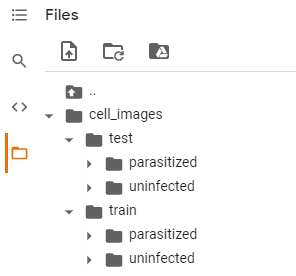

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [ ]:
from collections import Counter
print('Train:', Counter(train_labels), '\nTest:', Counter(test_labels))

Train: Counter({1: 12582, 0: 12376}) 
Test: Counter({1: 1300, 0: 1300})


In [ ]:
# Shape of labels 
print(type(test_images), type(test_labels))
print(len(test_images), len(test_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
2600 2600


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

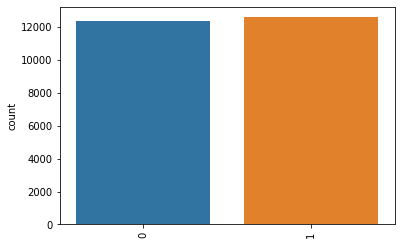

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
sns.countplot(train_labels)
plt.xticks(rotation = 'vertical')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

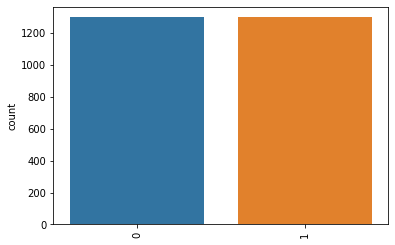

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
sns.countplot(test_labels)
plt.xticks(rotation = 'vertical')

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

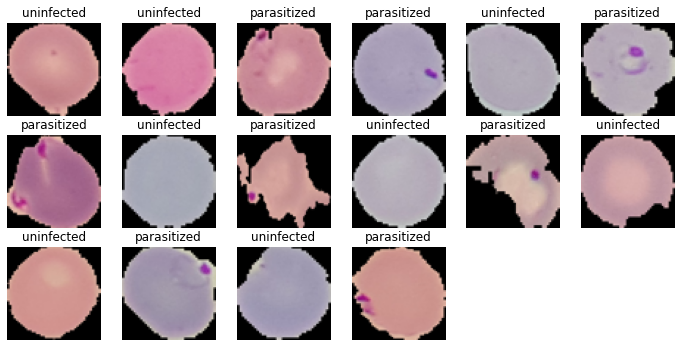

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random
#
random.seed(42)

tf.random.set_seed(42)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 14s 5ms/step - loss: 0.4202 - accuracy: 0.7934 - val_loss: 0.1894 - val_accuracy: 0.9375
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1219 - accuracy: 0.9531 - val_loss: 0.1287 - val_accuracy: 0.9798
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0941 - accuracy: 0.9680 - val_loss: 0.0801 - val_accuracy: 0.9888
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0803 - accuracy: 0.9723 - val_loss: 0.0760 - val_accuracy: 0.9912
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0775 - accuracy: 0.9736 - val_loss: 0.0437 - val_accuracy: 0.9934
Epoch 6/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0697 - accuracy: 0.9761 - val_loss: 0.0593 - val_accuracy: 0.9870
Epoch 7/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0698 - accuracy: 0.9764 - val_loss: 0.0734 - val_accuracy: 0.9868


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9800

 Test_Accuracy:- 0.9800000190734863


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



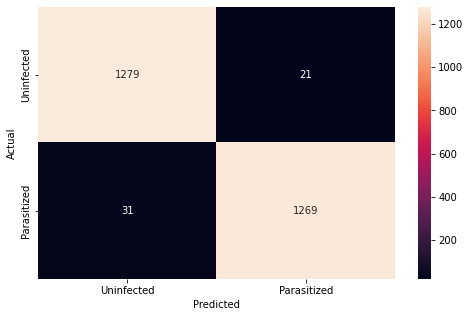

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

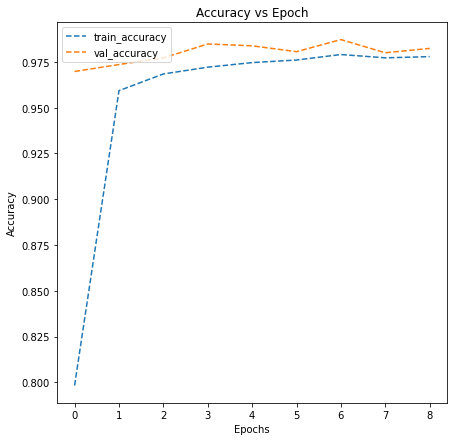

In [ ]:
plot_accuracy(history)

In [ ]:
# Function to plot train and validation accuracy 
def plot_loss(history):

    N = len(history.history["loss"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["loss"], label = "train_loss", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_loss"], label = "val_loss", ls = '--')

    plt.title("Loss vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Loss")
    
    plt.legend(loc="upper left")

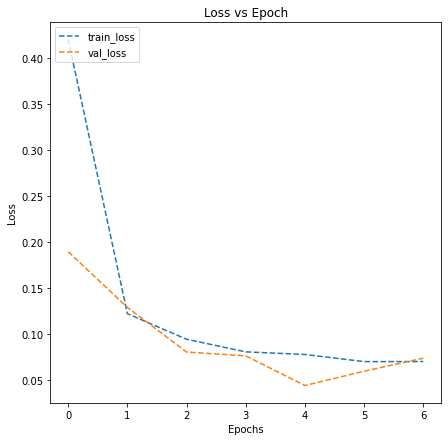

In [ ]:
plot_loss(history)

**Observations for the base model:**
- The base model has 3 convolution layers, 3 maxpooling layers, 4 dropout layers. It uses relu as the activation function. The final layer has an activation function of softmax which helps in classification problems. The epoch is 20.
- Callbacks monitors val_loss (loss function) in this case. We want to minimize the val_loss. The 'mode = min' by default. 'Patience' delays the triggering of the callback. The count of patience is the number of epochs on which we would like to see no improvement. We have set the patience value at 2.
- We already see a very high model accuracy for the validation dataset by using this model (**98%**). 
- The **model does not overfit the train data set**. We can conclude this from comparable accuracy in the training set (blue dotted line) and the validation set (orange dotted line). Here we can clearly observe that the training and validation accuracy are increasing. And we can also see that validation accuracy is slightly higher than the train accuracy.
- The loss function for the validation set decreases overall, which means that the error in the predicted outcome has decreased overall, although some minor fluctuations are observed.
- The **accuracy** for both the train and validation data sets **increases sharply** with increase in epoch till about 2 to 3 epochs.
- However, the accuracy begins to stabilize after approximately 2 to 3 epochs.
- The accuracy of the validation **can be improved by further hyperparameter tuning and image processing**.

- From the confusion matrix, we can see that most of the actual Vs predicted outcomes are along the diagonal, i.e., **most of the observations are correctly identified** by the model. 
- In 20 test images out of 2600 test images, uninfected cells have been incorrectly identified as parasitized and in 23 test images, parasitizedcells have been incorrectly identified as uninfected

- The model has a **98% recall, 98% precision and 98% F1-score**, which is a good performance.



So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()


# Build the model here and add new layers

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

#Add an extra convolution layer, maxpooling and dropout layer
model1.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

#end layer
model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()



model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001), metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 30, verbose = 1)

Epoch 1/30
624/624 [==============================] - 4s 6ms/step - loss: 0.6228 - accuracy: 0.6534 - val_loss: 0.6845 - val_accuracy: 0.8291
Epoch 2/30
624/624 [==============================] - 3s 5ms/step - loss: 0.3097 - accuracy: 0.8758 - val_loss: 0.1437 - val_accuracy: 0.9786
Epoch 3/30
624/624 [==============================] - 3s 5ms/step - loss: 0.1208 - accuracy: 0.9581 - val_loss: 0.0933 - val_accuracy: 0.9884
Epoch 4/30
624/624 [==============================] - 3s 5ms/step - loss: 0.1037 - accuracy: 0.9649 - val_loss: 0.0887 - val_accuracy: 0.9880
Epoch 5/30
624/624 [==============================] - 3s 5ms/step - loss: 0.0936 - accuracy: 0.9677 - val_loss: 0.0657 - val_accuracy: 0.9900
Epoch 6/30
624/624 [==============================] - 3s 5ms/step - loss: 0.0869 - accuracy: 0.9710 - val_loss: 0.0880 - val_accuracy: 0.9850
Epoch 7/30
624/624 [==============================] - 3s 5ms/step - loss: 0.0807 - accuracy: 0.9724 - val_loss: 0.0742 - val_accuracy: 0.9866
Epoch 

###<b> Evaluating the model

In [ ]:
accuracy = model1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9712

 Test_Accuracy:- 0.9711538553237915


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1300
           1       0.98      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



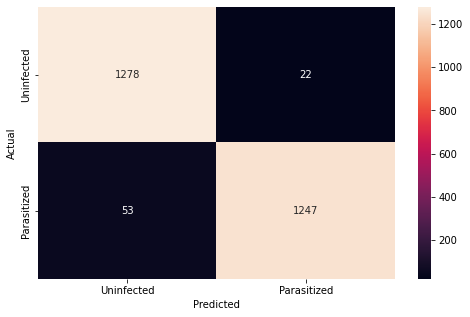

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history1.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

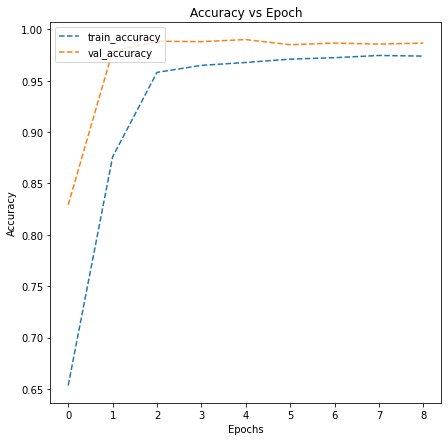

In [ ]:
plot_accuracy(history)

In [ ]:
# Function to plot train and validation accuracy 
def plot_loss(history1):

    N = len(history1.history["loss"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["loss"], label = "train_loss", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_loss"], label = "val_loss", ls = '--')

    plt.title("Loss vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Loss")
    
    plt.legend(loc="upper left")

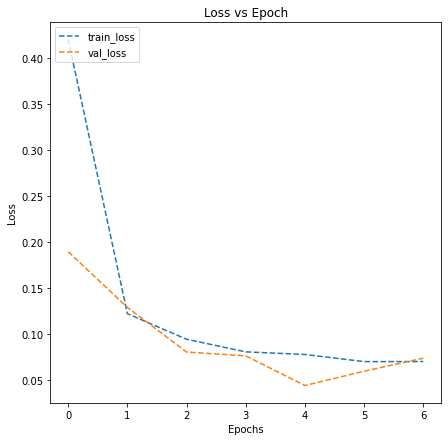

In [ ]:
plot_loss(history)

**Observations for model1:**
- One convolution layer has been added with leakyrelu activation function to the previous model.
- An extra maxpooling layer has been added. Increasing maxpooling layers progressively reduces the spatial size of the input image. This reduces the number of computations in the network. It sends only the important data to next layers in CNN. We see that our computational time has decreased after adding two maxpooling layers, although we have increased the number of hidden layers and the number of epochs. This apparently tiny difference in the time can manifest itself in a significant manner if we have a large dataset to process.
- An extra dropout layer has been added. Adding dropout layers prevent overfitting on the training data. These layers mask the contribution of some features towards the next layer and leaves the rest of the features unmodified. This ensures that the features that are learnt later in the samples are not overridden by the features that are learnt earlier in the training of the batches of training data.
- Increasing maxpooling layers progressively reduces the spatial size of the input image. This reduces the number of computations in the network. It sends only the important data to next layers in CNN. We see that our computational time has decreased after adding two maxpooling layers, although we have increased the number of hidden layers and the number of epochs. This apparently tiny difference in the time can manifest itself in a significant manner if we have a large dataset to process. 
-  Callbacks monitors val_loss (loss function) in this case. We want to minimize the val_loss. The 'mode = min' by default. 'Patience' delays the triggering of the callback. The count of patience is the number of epochs on which we would like to see no improvement. 
- We have also increased the number of epochs from 20 to 30.<br><br>





- The loss function for the validation set decreases and the **accuracy** for both the train and validation data sets **increase sharply** with increase in epoch.
- From the confusion matrix, we can see that most of the actual Vs predicted outcomes are along the diagonal, i.e., **most of the observations are correctly identified** by the model. 
- The model has a **98% recall, 98% precision and 98% F1-score**, which is a good performance.<br><br>


- The model accuracy for the validation dataset by using this model (**98%**). **There is no improvement in the accuracy even after increasing the layers, number of epoch and patience. Hence there is no benefit in increasing the convolution layers and epochs.**








###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2.add(LeakyReLU(0.1))



model2.add(MaxPool2D(pool_size = 2))
model2.add(BatchNormalization())

    
model2.add(Dropout(0.2))


model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2.add(LeakyReLU(0.1))


model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(0.1))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax"))

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 6ms/step - loss: 0.3648 - accuracy: 0.8481 - val_loss: 0.0088 - val_accuracy: 0.9988
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1326 - accuracy: 0.9557 - val_loss: 0.0266 - val_accuracy: 0.9968
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1025 - accuracy: 0.9686 - val_loss: 0.0400 - val_accuracy: 0.9944
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0901 - accuracy: 0.9723 - val_loss: 0.0494 - val_accuracy: 0.9914
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0837 - accuracy: 0.9742 - val_loss: 0.0345 - val_accuracy: 0.9964
Epoch 6/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0800 - accuracy: 0.9744 - val_loss: 0.1271 - val_accuracy: 0.9796


<b>Plotting the train and validation accuracy

In [ ]:
# Plotting the accuracies
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

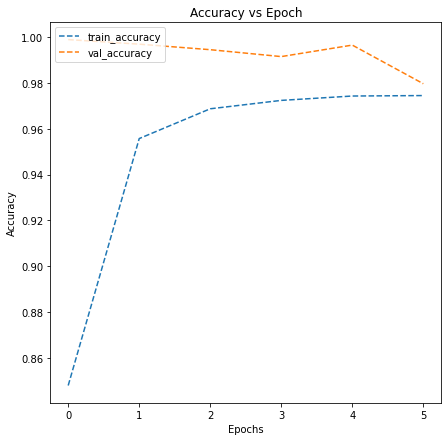

In [ ]:
plot_accuracy(history2)

In [ ]:
# Function to plot train and validation accuracy 
def plot_loss(history1):

    N = len(history2.history["loss"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["loss"], label = "train_loss", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_loss"], label = "val_loss", ls = '--')

    plt.title("Loss vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Loss")
    
    plt.legend(loc="upper left")

In [ ]:
#plot_loss(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4992

 Test_Accuracy:- 0.4992307722568512


####<b>Observations and insights:

- We have used the same layers as the base model, since increasing the layers and epoch in model 1 didn't yield a better model accuracy. 
- However, we have added batch normalization and changed the activation fucntion to leakyRelu.
- Batch normalization normalizes the contributions to a layer for every mini-batch. This reduces the number of training epochs required to train deep neural networks.
- We replaced ReLU activation function by leakyReLU activation function because it fixes the dying ReLU problem (since it has a non-zero slope below zero). It also helps train the neural network faster.
-**The test accuracy is still 98%. Hence no improvement in accuracy.**
- We also do not see any significant improvement in the time required to run an epoch even after using batchnormalization and leakyRelU.

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



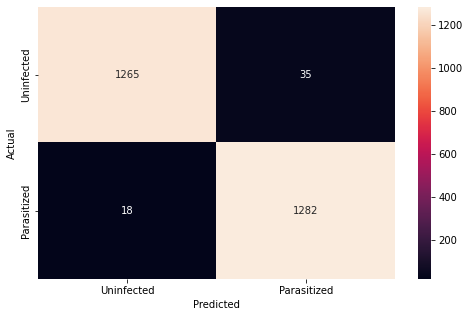

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
#imagedatagenerator: 1

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen1 = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)
                                 
val_datagen1  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator1 = train_datagen1.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator1 =  val_datagen1.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

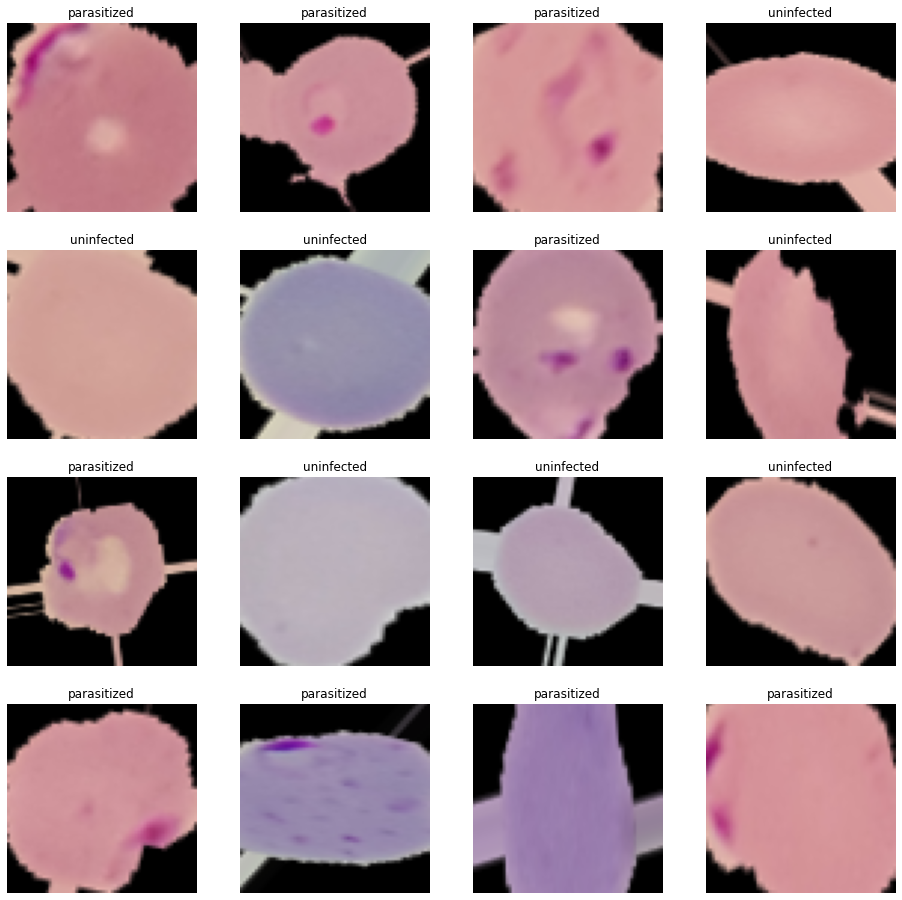

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator1)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

In [ ]:
#imagedatagenerator: 2

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen2 = ImageDataGenerator(horizontal_flip = True, 
                                    zoom_range = 0.75, rotation_range = 60)
                               
val_datagen2  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator2 = train_datagen2.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator2 =  val_datagen2.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

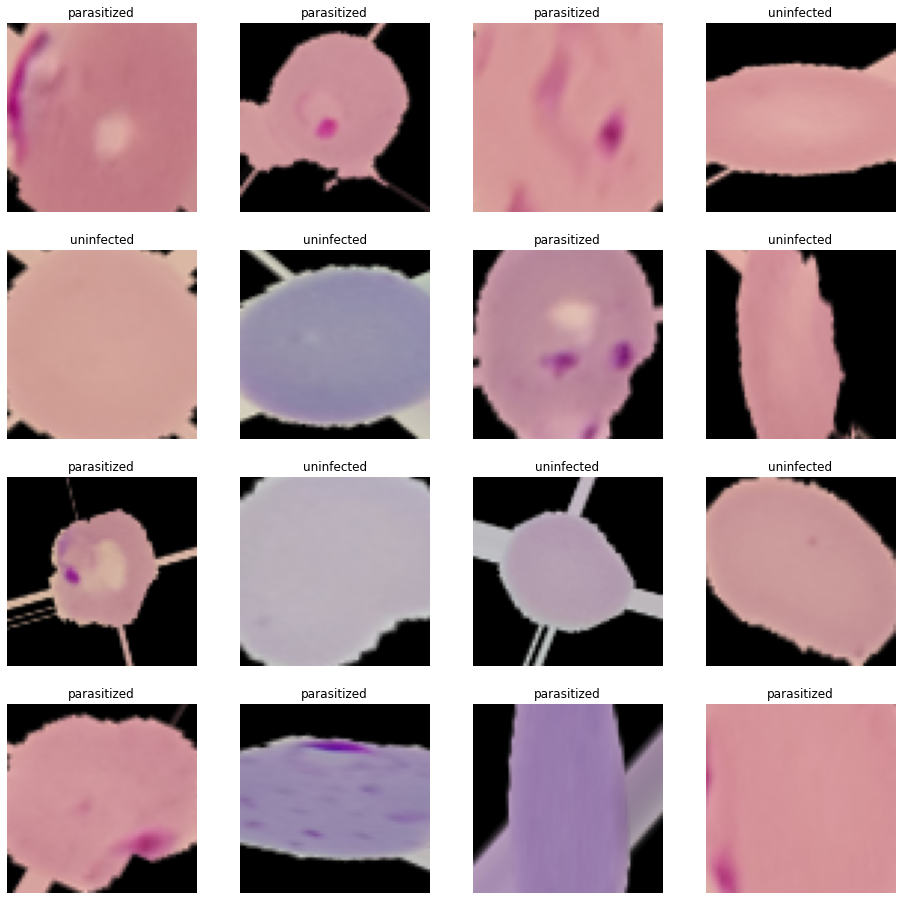

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator2)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

In [ ]:
#imagedatagenerator: 3

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen3 = ImageDataGenerator(horizontal_flip = True, 
                                    zoom_range = 0.85, rotation_range = 45)
                               
val_datagen3  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator3 = train_datagen3.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator3 =  val_datagen3.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

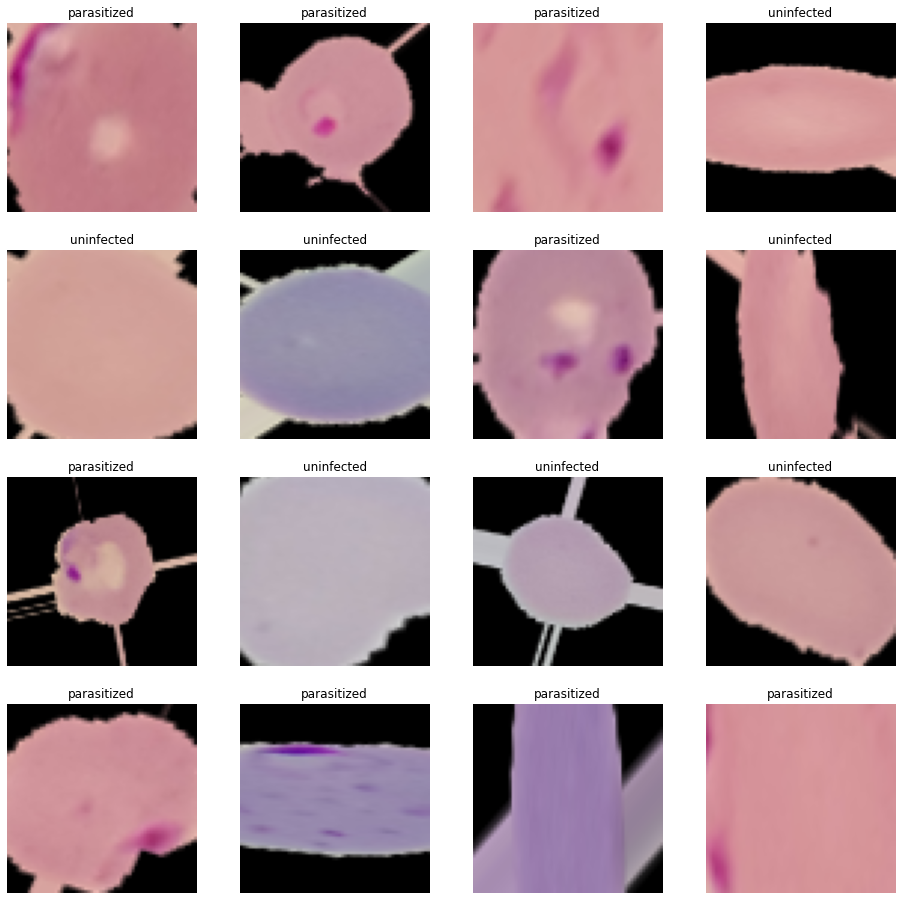

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator3)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

####<b>Observations and insights: ____

###<b>Building the Model

In [ ]:
# Build the model here
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model3.add(LeakyReLU(0.1))



model3.add(MaxPool2D(pool_size = 2))
model3.add(BatchNormalization())

    
model3.add(Dropout(0.2))


model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))


model3.add(MaxPooling2D(pool_size = 2))
model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))

model3.add(MaxPooling2D(pool_size = 2))
model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512))
model3.add(LeakyReLU(0.1))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax"))


# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator1, 
                      validation_data = val_generator1,                                  
                      batch_size = 32, callbacks = callbacks,
                      epochs = 10, verbose = 1)



Epoch 1/10
312/312 [==============================] - 35s 78ms/step - loss: 0.7227 - accuracy: 0.6544 - val_loss: 4.7141 - val_accuracy: 0.4892
Epoch 2/10
312/312 [==============================] - 23s 75ms/step - loss: 0.3697 - accuracy: 0.8443 - val_loss: 1.3592 - val_accuracy: 0.6444
Epoch 3/10
312/312 [==============================] - 24s 76ms/step - loss: 0.2519 - accuracy: 0.9046 - val_loss: 0.1921 - val_accuracy: 0.9345
Epoch 4/10
312/312 [==============================] - 25s 80ms/step - loss: 0.2109 - accuracy: 0.9249 - val_loss: 0.2417 - val_accuracy: 0.9387
Epoch 5/10
312/312 [==============================] - 23s 75ms/step - loss: 0.1887 - accuracy: 0.9336 - val_loss: 0.1329 - val_accuracy: 0.9605
Epoch 6/10
312/312 [==============================] - 23s 73ms/step - loss: 0.1838 - accuracy: 0.9360 - val_loss: 0.1371 - val_accuracy: 0.9603
Epoch 7/10
312/312 [==============================] - 24s 76ms/step - loss: 0.1743 - accuracy: 0.9403 - val_loss: 0.1129 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

In [ ]:
# Plotting the accuracies
# Function to plot train and validation accuracy 
def plot_accuracy(history3):

    N = len(history3.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history3.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history3.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

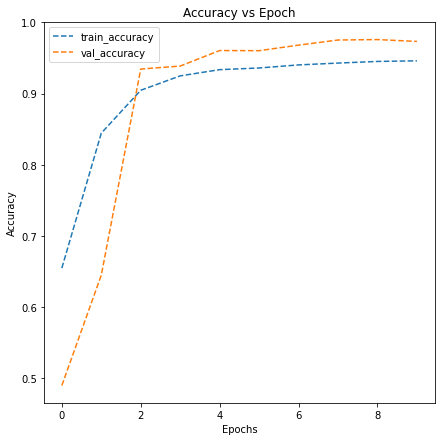

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])


82/82 [==============================] - 0s 5ms/step - loss: 0.0829 - accuracy: 0.9765

 Test_Accuracy:- 0.9765384793281555


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



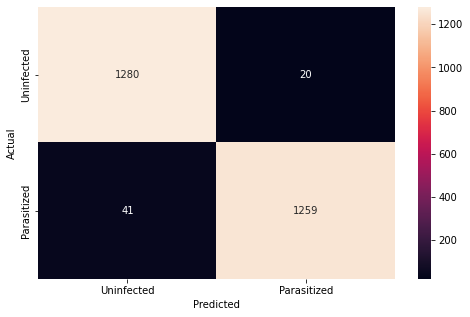

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
history3_2 = model3.fit(train_generator2, 
                      validation_data = val_generator2,                                  
                      batch_size = 32, callbacks = callbacks,
                      epochs = 10, verbose = 1)

Epoch 1/10
312/312 [==============================] - 25s 79ms/step - loss: 0.2213 - accuracy: 0.9159 - val_loss: 0.0997 - val_accuracy: 0.9714
Epoch 2/10
312/312 [==============================] - 24s 77ms/step - loss: 0.2136 - accuracy: 0.9190 - val_loss: 0.1033 - val_accuracy: 0.9734
Epoch 3/10
312/312 [==============================] - 26s 82ms/step - loss: 0.2143 - accuracy: 0.9205 - val_loss: 0.0963 - val_accuracy: 0.9742
Epoch 4/10
312/312 [==============================] - 24s 78ms/step - loss: 0.2142 - accuracy: 0.9190 - val_loss: 0.1052 - val_accuracy: 0.9702
Epoch 5/10
312/312 [==============================] - 26s 83ms/step - loss: 0.2106 - accuracy: 0.9215 - val_loss: 0.0902 - val_accuracy: 0.9750
Epoch 6/10
312/312 [==============================] - 24s 77ms/step - loss: 0.2091 - accuracy: 0.9201 - val_loss: 0.1053 - val_accuracy: 0.9776
Epoch 7/10
312/312 [==============================] - 24s 76ms/step - loss: 0.2105 - accuracy: 0.9224 - val_loss: 0.1138 - val_accuracy:

In [ ]:
# Evaluating the model on test data
accuracy3_2 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])


82/82 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.9823

 Test_Accuracy:- 0.9842307567596436


In [ ]:
history3_3 = model3.fit(train_generator3, 
                      validation_data = val_generator3,                                  
                      batch_size = 32, callbacks = callbacks,
                      epochs = 10, verbose = 1)

Epoch 1/10
312/312 [==============================] - 22s 71ms/step - loss: 0.2352 - accuracy: 0.9072 - val_loss: 0.0804 - val_accuracy: 0.9802
Epoch 2/10
312/312 [==============================] - 22s 71ms/step - loss: 0.2210 - accuracy: 0.9126 - val_loss: 0.0666 - val_accuracy: 0.9806
Epoch 3/10
312/312 [==============================] - 22s 72ms/step - loss: 0.2258 - accuracy: 0.9090 - val_loss: 0.0624 - val_accuracy: 0.9824
Epoch 4/10
312/312 [==============================] - 24s 76ms/step - loss: 0.2209 - accuracy: 0.9116 - val_loss: 0.0910 - val_accuracy: 0.9794
Epoch 5/10
312/312 [==============================] - 23s 74ms/step - loss: 0.2161 - accuracy: 0.9136 - val_loss: 0.0606 - val_accuracy: 0.9810
Epoch 6/10
312/312 [==============================] - 23s 72ms/step - loss: 0.2195 - accuracy: 0.9111 - val_loss: 0.0641 - val_accuracy: 0.9788
Epoch 7/10
312/312 [==============================] - 22s 72ms/step - loss: 0.2233 - accuracy: 0.9110 - val_loss: 0.0679 - val_accuracy:

In [ ]:
# Evaluating the model on test data
accuracy3_3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.9823

 Test_Accuracy:- 0.9842307567596436


###<b> Gaussian Blurring on train data

In [ ]:
import cv2

gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

 # Converting lists to arrays 

gbx = np.array(gbx)

In [ ]:
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b2 = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_test.append(b2)

gbx_test = np.array(gbx_test)

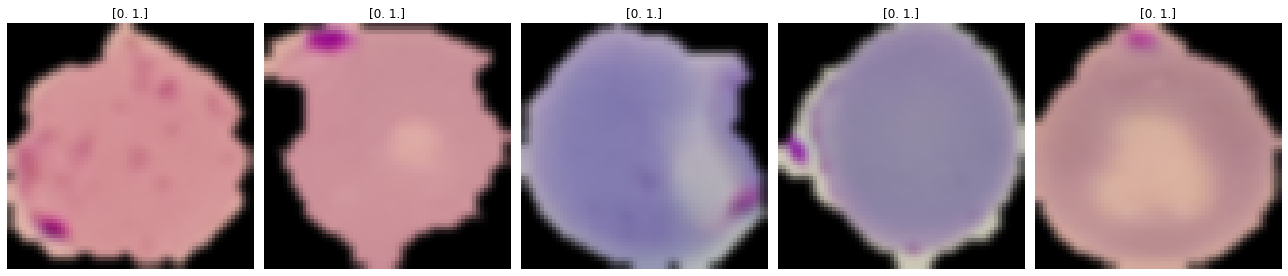

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Creating sequential model
model6 = Sequential()

model6.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model6.add(MaxPooling2D(pool_size = 2))

model6.add(Dropout(0.2))

model6.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model6.add(MaxPooling2D(pool_size = 2))

model6.add(Dropout(0.2))

model6.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model6.add(MaxPooling2D(pool_size = 2))

model6.add(Dropout(0.2))

model6.add(Flatten())

model6.add(Dense(512, activation = "relu"))

model6.add(Dropout(0.4))

model6.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)       

In [ ]:
model6.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history6 = model6.fit(gbx, train_labels batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 30, verbose = 1)

SyntaxError: ignored

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


# Add a dense layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model 
model4.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
              metrics = ['accuracy'])



<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history4 = model4.fit(train_images, train_labels,
                      batch_size = 32, callbacks = callbacks,
                      epochs = 10, verbose = 1)

Epoch 1/10
780/780 [==============================] - ETA: 0s - loss: 0.2299 - accuracy: 0.9121

780/780 [==============================] - 7s 7ms/step - loss: 0.2299 - accuracy: 0.9121
Epoch 2/10
774/780 [============================>.] - ETA: 0s - loss: 0.1689 - accuracy: 0.9395

780/780 [==============================] - 5s 7ms/step - loss: 0.1690 - accuracy: 0.9395
Epoch 3/10
776/780 [============================>.] - ETA: 0s - loss: 0.1552 - accuracy: 0.9430

780/780 [==============================] - 5s 7ms/step - loss: 0.1548 - accuracy: 0.9432
Epoch 4/10
777/780 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9471

780/780 [==============================] - 5s 7ms/step - loss: 0.1478 - accuracy: 0.9472
Epoch 5/10
773/780 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9492

780/780 [==============================] - 5s 7ms/step - loss: 0.1386 - accuracy: 0.9492
Epoch 6/10
777/780 [============================>.] - ETA: 0s - loss: 0.1330 - accuracy: 0.9513

780/780 [==============================] - 5s 7ms/step - loss: 0.1330 - accuracy: 0.9513
Epoch 7/10
776/780 [============================>.] - ETA: 0s - loss: 0.1288 - accuracy: 0.9545

780/780 [==============================] - 5s 7ms/step - loss: 0.1287 - accuracy: 0.9545
Epoch 8/10
780/780 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9540

780/780 [==============================] - 5s 7ms/step - loss: 0.1261 - accuracy: 0.9540
Epoch 9/10
777/780 [============================>.] - ETA: 0s - loss: 0.1201 - accuracy: 0.9555

780/780 [==============================] - 5s 7ms/step - loss: 0.1199 - accuracy: 0.9556
Epoch 10/10
777/780 [============================>.] - ETA: 0s - loss: 0.1243 - accuracy: 0.9553

780/780 [==============================] - 5s 7ms/step - loss: 0.1242 - accuracy: 0.9554


<b>Plot the train and validation accuracy

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1300
           1       0.96      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



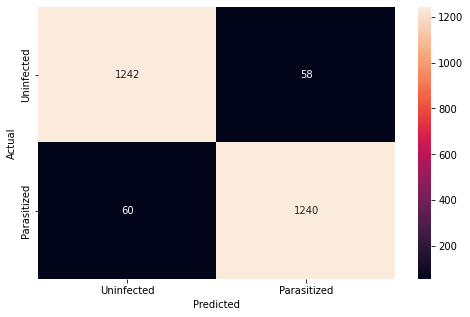

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# Plotting the accuracies
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history4.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history4.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history4.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

In [ ]:
#plot_accuracy(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.1078 - accuracy: 0.9669

 Test_Accuracy:- 0.9669230580329895


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1300
           1       0.97      0.94      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



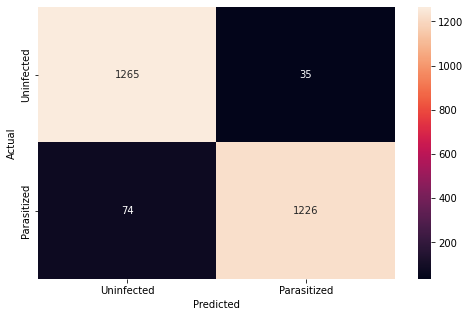

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Observation:</b>

Description: One can use a pre-trained model that has been created for a similar task instead of creating a model from scratch. This is known as transfer learning. One advantage of transfer learning is that we can build on it and introduce additional layers according to our requirements for the task at hand. We have used VGG16 for our task. We have used 10 epochs for this model since the accuracy converges pretty quickly within a few epochs. Patience for callback is 5. We flattened the output from the 3rd block of the VGG16 model. Added two dense layers with 128 and 64 neurons. The final dense layer has two neurons representing the two classes (uninfected and parasitized). There is also a dropout layer and a batch-normalization layer added to the VGG-16 model. We have used ReLU activation function in all additional layers except the final dense layer, which uses softmax because this is a classification task.                                     
Results: The VGG-16 pre-trained model didn’t perform as well as the other models for this task.


**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

###<b> VGG-19 model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras import Model

vgg = VGG19(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


# Add a dense layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model5 = Model(vgg.input, pred) # Initializing the model

In [ ]:
# Compiling the model 
model5.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
              metrics = ['accuracy'])

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history5 = model5.fit(train_images, train_labels,
                      batch_size = 32, callbacks = callbacks,
                      epochs = 10, verbose = 1)

Epoch 1/10
780/780 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.8937

780/780 [==============================] - 9s 10ms/step - loss: 0.2709 - accuracy: 0.8937
Epoch 2/10
777/780 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.9278

780/780 [==============================] - 8s 10ms/step - loss: 0.1927 - accuracy: 0.9279
Epoch 3/10
780/780 [==============================] - ETA: 0s - loss: 0.1792 - accuracy: 0.9337

780/780 [==============================] - 8s 11ms/step - loss: 0.1792 - accuracy: 0.9337
Epoch 4/10
779/780 [============================>.] - ETA: 0s - loss: 0.1665 - accuracy: 0.9385

780/780 [==============================] - 9s 11ms/step - loss: 0.1667 - accuracy: 0.9385
Epoch 5/10
779/780 [============================>.] - ETA: 0s - loss: 0.1614 - accuracy: 0.9415

780/780 [==============================] - 8s 10ms/step - loss: 0.1614 - accuracy: 0.9415
Epoch 6/10
779/780 [============================>.] - ETA: 0s - loss: 0.1543 - accuracy: 0.9432

780/780 [==============================] - 8s 10ms/step - loss: 0.1542 - accuracy: 0.9433
Epoch 7/10
778/780 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9445

780/780 [==============================] - 8s 10ms/step - loss: 0.1496 - accuracy: 0.9445
Epoch 8/10
776/780 [============================>.] - ETA: 0s - loss: 0.1491 - accuracy: 0.9447

780/780 [==============================] - 8s 10ms/step - loss: 0.1487 - accuracy: 0.9447
Epoch 9/10
777/780 [============================>.] - ETA: 0s - loss: 0.1431 - accuracy: 0.9474

780/780 [==============================] - 8s 11ms/step - loss: 0.1431 - accuracy: 0.9475
Epoch 10/10
778/780 [============================>.] - ETA: 0s - loss: 0.1445 - accuracy: 0.9474

780/780 [==============================] - 8s 11ms/step - loss: 0.1444 - accuracy: 0.9474


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1300
           1       1.00      0.82      0.90      1300

    accuracy                           0.91      2600
   macro avg       0.92      0.91      0.91      2600
weighted avg       0.92      0.91      0.91      2600



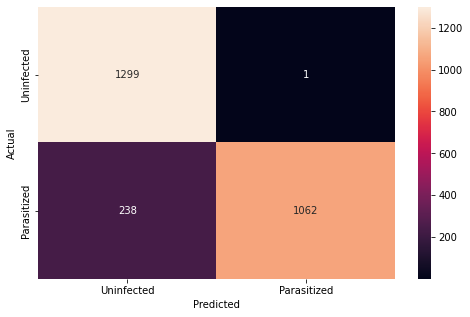

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model5.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# Evaluating the model on test data
accuracy5 = model5.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy5[1])

82/82 [==============================] - 1s 9ms/step - loss: 0.2850 - accuracy: 0.9081

 Test_Accuracy:- 0.9080769419670105


####<b> Observations and Conclusions drawn from the final model: 


Description: Used pre-trained model with 19 convolution layer that has been already created for a similar task. Additional layers, activation function and number of epochs is the same as Model 4.
Results: The VGG-19 pre-trained model also didn’t perform as well as the other models for this task.



###<b> HSV

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

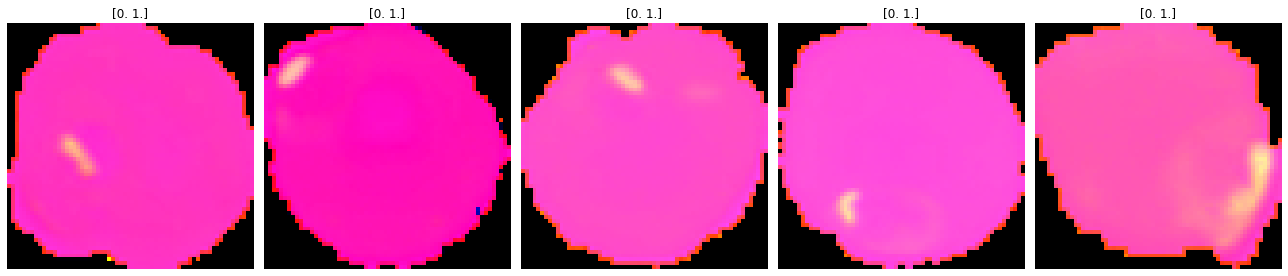

In [ ]:
viewimage = np.random.randint(1,100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

    Title = train_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(gfx[i])
    ax[t].set_axis_off()
    fig.tight_layout()

Observations:

PROPOSAL FOR THE FINAL SOLUTION:

The base model has a fairly good accuracy for test image classification. However, in order to improve the accuracy, we have applied several different techniques like increasing layers, changing activation functions, introducing batch-normalization, applying image augmentation and transfer learning method using VGG-16 and VGG-19. For a complex task, we need more learnable parameters. And for more learnable parameters we need more data. In order to deal with limited data in real life tasks, we use data augmentation. Data augmentation synthesizes new data from existing data. The best model in terms of accuracy in prediction of the test images is the one with data augmentation (Model3, Model3_2, Model3_3). All the three models have image augmentation applied by using different hyperparameters. These models have an accuracy of 98.42% for the test images. However, one flip side to this model is that the run time is almost 4-6 times longer than the other models. Also, it is important to note that the probability that a sick patient is detected by the classifier is determined by ‘recall’. Note that Recall minimized false negatives for parasitized cells because we want to identify correctly as many infected cells as possible. False positives are better than false negatives in this case because the patient can undergo further diagnosis to figure out if they are infected. Although the recall for VGG-19 is excellent for uninfected people, it is not so for parasitized people. The accuracy of the model with augmented images and the base model are comparable (within the error limit). But the time required to run the model with augmented images is 4-6 times longer than that required for the base model. Hence, I propose using the base model for the classification of infected and parasitized malaria blood cells. I also propose using an epoch of about 10, because the accuracy converges pretty quickly within the first few epochs.



RISKS AND SOLUTIONS

Risk1: Major processing lag in training the models when run on CPUs. For training large number of parameters over increased epochs, the code ran very slowly and/or crashed.
Solution: Using GPU (Graphics Processing Unit) one can increase the performance of the code. It is a specialized processor with dedicated memory for rendering graphics. I bought access to premium GPU from Google in order to run the codes successfully on Google Colab.
Risk2: Callbacks are used for early stopping of the training process when the validation loss doesn’t improve any longer. However, sometimes this value can get stuck in a local minima.
Solution: We can use the ‘ReduceLROnPlateau’ to change the learning rate if the validation loss doesn’t improve after the number of epochs as specified by ‘patience.
Risk3: Transfer learning, although easier to use, do not yield good results for this particular task, even with added layers. 
Solution: Use CNN models built from scratch and tune the hyperparameters to improve the performance.


EXECUTIVE BUSINESS SOLUTION

Convolutional Neural Network (CNN) must be used instead of visually inspecting the blood cells of the patients for malaria parasites in order to increase 
•	accuracy, 
•	cost-effectiveness (by eliminating the need of skilled personnel required for visual inspection), 
•	ease, 
•	scalability,
•	and for early detection of malaria and saving lives.

